# ANÁLISES GRID DE BEST ESTIMATOR

Mejores algoritmos propuestos por LazyPredict:

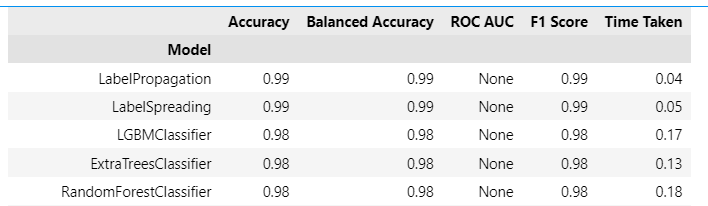

## IMPORTACIÓN DE PAQUETES

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#Modelos

from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle


## IMPORTACIÓN DE DATOS

### Cargar los datos

In [60]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')
df_tablon.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-63,-60,-60,-67,-76,-85,-84,1
2,-61,-60,-68,-62,-77,-90,-80,1
3,-63,-65,-60,-63,-77,-81,-87,1
4,-64,-55,-63,-66,-76,-88,-83,1


### Separar predictoras y target

In [61]:
x = df_tablon.drop(columns= 'room').copy()
y = df_tablon.room.copy()

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACION

In [62]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state=1)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [63]:
pipe = Pipeline([('algoritmo',XGBClassifier())])

grid = [

        {
                'algoritmo' : [LGBMClassifier()],
                'algoritmo__num_leaves': [15, 31, 63],  # Número máximo de hojas en un árbol
                'algoritmo__learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje
                'algoritmo__max_depth': [-1, 5, 10],  # Profundidad máxima de un árbol (-1 significa sin límite)
                'algoritmo__min_child_samples': [20, 50, 100],  # Mínimo de muestras por hoja
                'algoritmo__subsample': [0.8, 0.9, 1.0],  # Proporción de muestras utilizadas en cada árbol
                'algoritmo__colsample_bytree': [0.8, 0.9, 1.0],  # Proporción de características utilizadas en cada árbol
                'algoritmo__reg_alpha': [0.0, 0.1, 0.5],  # Regularización L1
                'algoritmo__reg_lambda': [0.0, 0.1, 0.5],  # Regularización L2
                'algoritmo__n_estimators': [100, 200, 300]  # Número de árboles en el ensemble
        }
]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [64]:
grid_search = GridSearchCV(estimator= pipe,
                           param_grid= grid,
                           cv=4,
                           scoring= 'accuracy',
                           verbose=0,
                           n_jobs= -1)

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 7
[LightGBM] [Info] Start training from score -1.398615
[LightGBM] [Info] Start training from score -1.406914
[LightGBM] [Info] Start training from score -1.394491
[LightGBM] [Info] Start training from score -1.346289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__colsample_bytree,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__min_child_samples,param_algoritmo__n_estimators,...,param_algoritmo__reg_lambda,param_algoritmo__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4050,2.731083,0.404797,0.018898,0.007541,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.8,0.01,10,50,300,...,0.0,0.8,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.995918,0.979592,0.979592,0.983673,0.984694,0.006691,1
9920,1.656278,0.022680,0.008987,0.000721,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.9,0.01,5,50,300,...,0.0,1.0,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.995918,0.979592,0.979592,0.983673,0.984694,0.006691,1
3386,1.707959,0.148762,0.009083,0.001313,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.8,0.01,5,50,300,...,0.0,1.0,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.995918,0.979592,0.979592,0.983673,0.984694,0.006691,1
3385,1.628456,0.055670,0.017679,0.011455,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.8,0.01,5,50,300,...,0.0,0.9,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.995918,0.979592,0.979592,0.983673,0.984694,0.006691,1
3384,1.649540,0.034493,0.008504,0.000311,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.8,0.01,5,50,300,...,0.0,0.8,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.995918,0.979592,0.979592,0.983673,0.984694,0.006691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19465,0.454849,0.053049,0.005296,0.000409,"LGBMClassifier(colsample_bytree=0.8, learning_...",1.0,0.001,10,100,100,...,0.5,0.9,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.926531,0.926531,0.963265,0.946939,0.940816,0.015408,19549
19466,0.441810,0.023591,0.006531,0.000814,"LGBMClassifier(colsample_bytree=0.8, learning_...",1.0,0.001,10,100,100,...,0.5,1.0,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.926531,0.926531,0.963265,0.946939,0.940816,0.015408,19549
11481,0.467439,0.007723,0.005244,0.000446,"LGBMClassifier(colsample_bytree=0.8, learning_...",0.9,0.001,-1,100,100,...,0.5,0.8,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.926531,0.926531,0.963265,0.946939,0.940816,0.015408,19549
18060,0.460759,0.056911,0.007186,0.002317,"LGBMClassifier(colsample_bytree=0.8, learning_...",1.0,0.001,-1,100,100,...,0.5,0.8,{'algoritmo': LGBMClassifier(colsample_bytree=...,0.926531,0.926531,0.963265,0.946939,0.940816,0.015408,19549


In [65]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01,
                                min_child_samples=50, n_estimators=300,
                                num_leaves=15, subsample=0.8))])

In [66]:
modelo.best_params_

{'algoritmo': LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, min_child_samples=50,
                n_estimators=300, num_leaves=15, subsample=0.8),
 'algoritmo__colsample_bytree': 0.8,
 'algoritmo__learning_rate': 0.01,
 'algoritmo__max_depth': -1,
 'algoritmo__min_child_samples': 50,
 'algoritmo__n_estimators': 300,
 'algoritmo__num_leaves': 15,
 'algoritmo__reg_alpha': 0.0,
 'algoritmo__reg_lambda': 0.0,
 'algoritmo__subsample': 0.8}

In [67]:
modelo.best_score_

0.9846938775510203

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [68]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [69]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre Train

In [70]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [71]:
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Accuracy: 0.9938775510204082
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      0.98      0.99       240
           3       0.98      1.00      0.99       243
           4       1.00      1.00      1.00       255

    accuracy                           0.99       980
   macro avg       0.99      0.99      0.99       980
weighted avg       0.99      0.99      0.99       980



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### Predecir sobre la validación

In [72]:
pred = modelo.best_estimator_.predict(val_x)

Evaluar sobre la validación

In [73]:
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Accuracy: 0.9714285714285714
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       110
           2       0.98      0.94      0.96        95
           3       0.94      0.95      0.94       107
           4       0.99      1.00      1.00       108

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



#### Gráfico entre la diferencia entre la validación y el original

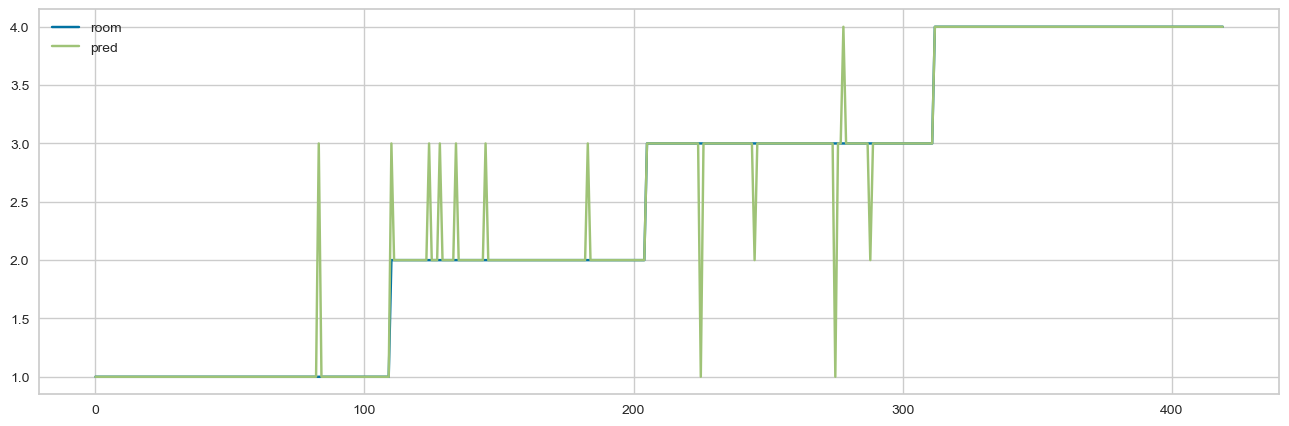

In [74]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='room').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred[['room','pred']].plot(figsize=(16,5));

## REPORTING DEL MODELO

Matrix de Confusión MultiClass

Text(0.5, 1.0, 'Confusion Matrix')

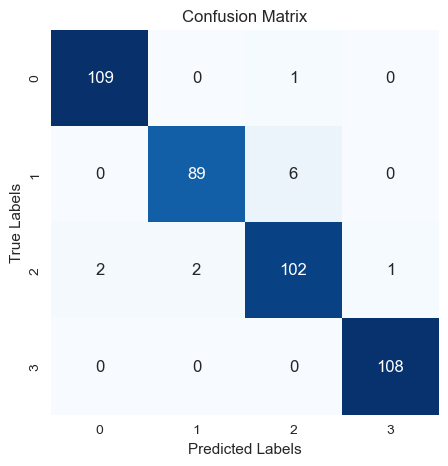

In [75]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")


ROC CHART MULTICLASS

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


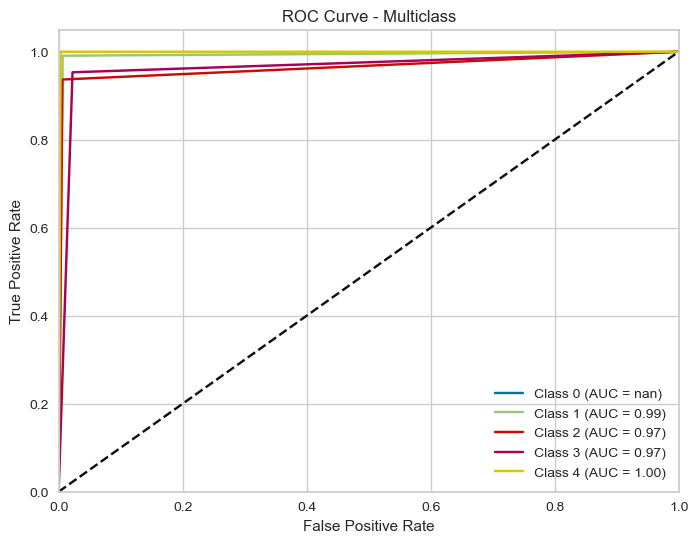

In [76]:
# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(val_y))+1
binarized_val_y = label_binarize(val_y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear el gráfico ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right");

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [77]:
version_estimator = '_v03'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'LGBMClassifier_v03.pickle'

In [78]:
m_best_estimator

'LGBMClassifier'

In [79]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [80]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Cambiamos a LGBM"
x_columns = list(x.columns)
y_target = y.name


In [81]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                       LGBMClassifier
m_Best_paramans     {'algoritmo': LGBMClassifier(colsample_bytree=...
m_Best_Score                                       0.9846938775510203
t_accuracy                                                   0.993878
t_report                          precision    recall  f1-score   ...
v_accuracy                                                   0.971429
v_report                          precision    recall  f1-score   ...
comentarios                                          Cambiamos a LGBM
predictoras_X       [wifi1, wifi2, wifi3, wifi4, wifi5, wifi6, wifi7]
target_y                                                         room
Name: LGBMClassifier_v03.pickle, dtype: object

In [82]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [83]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')